## Draft metrics of dataset value

In [1]:
from rc_util import * # to do: add 'calc_data_badge' function or similar

In [2]:
# build a graph from the JSON-LD corpus
net = RCNetwork()

# net.parse_corpus(Path("../corpus/corpus.jsonld"))
# rank and scale each entity
# net.build_analytics_graph()

In [3]:
# parses, builds NetworkX graph, and creates default "rank" for each entity
net.load_network("full.jsonld") # net.load_network("../../rclc/corpus.jsonld")

29809.242010116577

#### simple ways to explore the RCNetwork

In [ ]:
# view an element of the graph
net.data['dataset-b1b062c8a276fe2800fd'].view

In [ ]:
# net.prov['provider-99fda6d9f6fbf67c3f72'].view

net.prov['provider-99fda6d9f6fbf67c3f72'].view['title']

In [ ]:
# net.get_id('publication-639196e25a9adcadaaf2')
# net.id_list # returns

net.get_id('dataset-b1b062c8a276fe2800fd') # to find in nxg if needed

In [ ]:
len(net.publ.keys()), len(net.prov.keys()), len(net.data.keys())

In [ ]:
subgraph, paths, node_id = net.get_subgraph('NOAA', 2)

In [ ]:
# no entries with full NOAA name
for p in net.prov.keys():
    if net.prov[p].view['title']=='National Oceanic and Atmospheric Administration':
        print(net.prov[p].view)

In [ ]:
# provider entry uses abbreviation
for p in net.prov.keys():
    if net.prov[p].view['title']=='NOAA':
        print(net.prov[p].view)

In [ ]:
## gather NOAA datasets

data_list = []

for d in net.data.keys():
    if net.data[d].view['provider']=='provider-e4db130cccc74f809faf':
#         print(net.data[d].view)
        data_list.append(net.data[d].view['id'])

### some more ways to access RCNetwork

In [ ]:
net.data[data_list[3]].view

In [ ]:
# edges from this node
net.nxg[net.get_id(net.data[data_list[3]].view["id"])]

In [ ]:
net.id_list[2617]

In [ ]:
net.labels[25501]

In [ ]:
# test 'recommended links' function
uuid, title, rank, url, provider, publ_list = net.reco_data(net.data[data_list[3]])

In [ ]:
for pub in net.publ.keys():
    if 'dataset-26993827b8a6f43da2bc' in net.publ[pub].view['datasets']:
        print(net.publ[pub].view)

In [ ]:
for pub in publ_list:
    print(pub)

In [ ]:
net.publ[net.id_list[25501]].view

In [ ]:
# spot check a dataset in the list is found in at least some publications
for p in net.publ.keys():
        if data_list[4] in net.publ[p].view['datasets']:
            print('found data')

In [ ]:
## replicate for USDA
for p in net.prov.keys():
    if net.prov[p].view['title']=='USDA':
        print(net.prov[p].view)

In [ ]:
for p in net.prov.keys():
    if net.prov[p].view['title']=='US Department of Agriculture':
        print(net.prov[p].view)

In [ ]:
## gather USDA datasets

data_list = []

for d in net.data.keys():
    if net.data[d].view['provider']=='provider-d2d242eddffb73cc92c0':
        print(net.data[d].view['id'], net.data[d].view['title'])
        data_list.append(net.data[d].view['id'])

In [ ]:
net.reco_data(net.data['dataset-f65e9e0b7b63697db36a'])

In [ ]:
net.publ[net.id_list[2775]].view

In [ ]:
for p in net.prov.keys():
    if net.prov[p].view['title']=='IRI':
        print(net.prov[p].view)

In [ ]:
# gete dataset ids for just IRI
data_list = []

for d in net.data.keys():
    if net.data[d].view['provider']=='provider-19eb7b3b445e1a00d385':
        print(net.data[d].view['id'], net.data[d].view['title'])
        data_list.append(net.data[d].view['id'])

In [4]:
num_datasets = len(set(net.data.keys()))

num_publications = len(set(net.publ.keys()))

num_providers = len(set(net.prov.keys()))

num_authors = len(set(net.auth.keys()))

print("this corpus has: \n--{:,.0f} datasets \n--{:,.0f} publications \n--{:,.0f} providers \n--{:,.0f} authors".format(
num_datasets, num_publications, num_providers, num_authors))

this corpus has: 
--619 datasets 
--3,816 publications 
--378 providers 
--8,249 authors


In [6]:
net.data['dataset-f65e9e0b7b63697db36a'].view

{'id': 'dataset-f65e9e0b7b63697db36a',
 'title': 'Nielsen Homescan',
 'provider': 'provider-d2d242eddffb73cc92c0',
 'url': 'https://catalog.data.gov/dataset/nielsen-homescan',
 'used': True}

In [7]:
net.prov['provider-d2d242eddffb73cc92c0'].view

{'id': 'provider-d2d242eddffb73cc92c0',
 'title': 'US Department of Agriculture',
 'ror': 'https://ror.org/01na82s61',
 'used': True}

### Gather dataset labels and initial measures

In [ ]:
# # V1 - was not sure of `reco_data()` grabbed all publications; appears it does
# DataID = [] # RC UUID
# DataName = [] # title
# DataRank = [] # rank
# RecPubCount = [] # count of publications from 'recommender'
# TotPubCount = [] # total publications that are linked to this dataset
# CombinedData = [] # total count of other datasets linked to publications
# UniqueCombData = [] # unique count of other datsets linked to publications

# for d in data_list:
#     # gather  info from 'recommender'; it sorts the publications based on Eigenvector calc of 'rank'
#     uuid, title, rank, url, provider, publ_list = net.reco_data(net.data[d])
#     DataID.append(uuid)
#     DataName.append(title)
#     DataRank.append(rank)
#     RecPubCount.append(len(publ_list))
#     # search through all publications for current dataset
#     co_data = []
#     num_pubs = 0
#     for p in net.publ.keys():
#         if d in net.publ[p].view['datasets']:
#             num_pubs += 1 # pub uses current data
#             d_list = net.publ[p].view['datasets'].copy()
#             d_list.remove(uuid) # don't include current dataset
#             co_data = co_data + d_list # ** LIST OF DATASETS; use to eg calculate data provider co-occurence
#             #print('----- added pub')
#     TotPubCount.append(num_pubs)
#     CombinedData.append(len(co_data))
#     UniqueCombData.append(len(set(co_data)))
    
# # save metrics to dataframe to explore
# df = pd.DataFrame({'RC_uuid': DataID, 'Dataset_Name': DataName, 'RC_rank': DataRank, 'num_rec_pubs': RecPubCount,
#                   'total_pubs': TotPubCount, 'combined_data': CombinedData, 'num_unique_data_join': UniqueCombData})

In [61]:
net.publ[net.id_list[p_id]].view

{'id': 'publication-012594773be6c5c8af7b',
 'title': 'The Effect of Work First Job Placements on the Distribution of Earnings: An Instrumental Variable Quantile Regression',
 'doi': '',
 'pdf': None,
 'journal': None,
 'abstract': '',
 'datasets': ['dataset-18202ba62256e4e8776f', 'dataset-fb7908039273841db7b1'],
 'authors': [],
 'topics': []}

In [66]:
# V2 - make better use of `reco_data()`
DataID = [] # RC UUID
DataName = [] # title
DataURL = [] # reference URL
DataProv = [] # dataset provider
DataRank = [] # rank
TotPubCount = [] # total publications that are linked to this dataset
CombinedData = [] # total count of other datasets linked to publications
UniqueCombData = [] # unique count of other datsets linked to publications
NumSameProv = [] # number of datasets joined to this dataset owned by same provider
NumOtherProv = [] # number of datasets joined to this dataset owned by a different provider
UniqueOtherProv = [] # unique count of other providers

dataset_links = []

for d in net.data.keys(): #data_list:
    # gather  info from 'recommender'; it sorts the publications based on Eigenvector calc of 'rank'
    uuid, title, rank, url, provider, publ_list = net.reco_data(net.data[d])
    DataID.append(uuid)
    DataName.append(title)
    DataRank.append(rank)
    DataURL.append(url)
    DataProv.append(provider[1]) # grab name; 2nd element of "provider"
    TotPubCount.append(len(publ_list))
    # collect datasets linked to publications for current dataset
    co_data = []
    pub_dois = []
    pub_titles = []
    pub_rcids = []
    for p_id, _title, _rank in publ_list:
        d_list = net.publ[net.id_list[p_id]].view['datasets'].copy()
        d_list.remove(uuid) # don't include current dataset
        co_data = co_data + d_list # ** LIST OF DATASETS; use to eg calculate data provider co-occurence
        p_doi = net.publ[net.id_list[p_id]].view['doi']
        pub_dois = pub_dois + [p_doi for e in d_list] # make list of DOIs same as number of linked datasets
        p_rcid = net.publ[net.id_list[p_id]].view['id']
        pub_rcids = pub_rcids + [p_rcid for e in d_list]
        pub_titles = pub_titles + [_title for e in d_list]
    CombinedData.append(len(co_data))
    UniqueCombData.append(len(set(co_data)))
    
    # summarize datasets by this provider vs other providers
    co_prov = [net.prov[net.data[co].view['provider']].view['id'] for co in co_data]
    NumSameProv.append(len([p for p in co_prov if p==net.data[d].view['provider']]))
    other_provs = [p for p in co_prov if p!=net.data[d].view['provider']]
    NumOtherProv.append(len(other_provs))
    UniqueOtherProv.append(len(set(other_provs)))
    
    co_titles = [net.data[co].view['title'] for co in co_data]
    co_prov_names = [net.prov[net.data[co].view['provider']].view['title'] for co in co_data]
    
    d_uuids = [d for co in co_data]
    titles = [title for co in co_data]
    providers = [provider[1] for co in co_data]
    
    dls = pd.DataFrame({'DataRCID': d_uuids, 'DataRCName': titles, 'DataRCProv': providers, 
                        'LinkedDataRCID': co_data, 'LinkedDataRCNames': co_titles, 
                        'LinkedDataRCProviders': co_prov_names, 'PubDOI': pub_dois,
                       'PubRCID': pub_rcids, 'PubTitle': pub_titles})
    dataset_links.append(dls)

In [14]:
# save metrics to dataframe to explore
df = pd.DataFrame({'RC_uuid': DataID, 'Dataset_Name': DataName, 
                   'RC_URL': DataURL, 'RC_Provider': DataProv, 'RC_rank': DataRank, 
                  'total_pubs': TotPubCount, 'combined_data': CombinedData, 'num_unique_data_join': UniqueCombData,
                  'count_same_prov': NumSameProv, 'count_diff_prov': NumOtherProv, 
                   'num_unique_diff_prov': UniqueOtherProv})

In [15]:
df.head()

,RC_uuid,Dataset_Name,RC_URL,RC_Provider,RC_rank,total_pubs,combined_data,num_unique_data_join,count_same_prov,count_diff_prov,num_unique_diff_prov
0,dataset-d7abbc1e566a22068f1d,Maine Sea Level Rise,https://mgs-maine.opendata.arcgis.com/datasets...,Maine Geological Survey,0.0435,1,1,1,0,1,1
1,dataset-b2063e7c8ba68a048d87,Iowa Medicaid Information System,https://dhs.iowa.gov/ime/contracts/resource-li...,Iowa Department of Human Services,0.0092,1,5,5,5,0,0
2,dataset-5eb698d20631f3425eba,The Special Nutrition Program Operations Study,https://www.fns.usda.gov/special-nutrition-pro...,US Department of Agriculture,0.8123,1,0,0,0,0,0
3,dataset-c8d47db36ff66f36666b,Billion-Dollar Weather and Climate Disasters,https://www.ncdc.noaa.gov/billions/events,NOAA,0.2970,3,0,0,0,0,0
4,dataset-7342a430cff8e8ba688a,New York State Division of Criminal Justice Se...,https://www.criminaljustice.ny.gov/crimnet/ojs...,New York State Division of Criminal Justice Se...,0.3280,3,18,16,0,18,16


In [68]:
data_linkages = pd.concat(dataset_links)

In [17]:
df[df['RC_Provider']=='NOAA'].head()

,RC_uuid,Dataset_Name,RC_URL,RC_Provider,RC_rank,total_pubs,combined_data,num_unique_data_join,count_same_prov,count_diff_prov,num_unique_diff_prov
3,dataset-c8d47db36ff66f36666b,Billion-Dollar Weather and Climate Disasters,https://www.ncdc.noaa.gov/billions/events,NOAA,0.2970,3,0,0,0,0,0
7,dataset-12e53d67c1e289b8fd01,US Climate Divisions,https://www.ncdc.noaa.gov/monitoring-reference...,NOAA,0.5919,4,11,11,5,6,1
40,dataset-9c5fed76bbcb0ce5d978,Economics: National Ocean Watch,https://coast.noaa.gov/digitalcoast/data/enow....,NOAA,0.3947,11,14,9,2,12,6
41,dataset-2d02a870a1d2cfd86a6c,National Land Cover Database,https://coast.noaa.gov/digitalcoast/data/nlcd....,NOAA,0.4478,6,22,20,3,19,12
87,dataset-df0ad972c8f854896ac4,Global Forecast System,https://www.ncdc.noaa.gov/data-access/model-da...,NOAA,0.7782,50,0,0,0,0,0


In [18]:
df.shape

(619, 11)

In [ ]:
# save metrics as table
df.to_csv('rc_metrics_full_0915.csv', index=False)

In [19]:
data_linkages.head()

,DataRCID,DataRCName,DataRCProv,LinkedDataRCID,LinkedDataRCNames,LinkedDataRCProviders
0,dataset-d7abbc1e566a22068f1d,Maine Sea Level Rise,Maine Geological Survey,dataset-5e63059e69a541436b0e,Social Vulnerability Index,Centers for Disease Control and Prevention
0,dataset-b2063e7c8ba68a048d87,Iowa Medicaid Information System,Iowa Department of Human Services,dataset-709a0f04a29ebe08f595,Iowa Unemployment Insurance,Iowa Department of Human Services
1,dataset-b2063e7c8ba68a048d87,Iowa Medicaid Information System,Iowa Department of Human Services,dataset-fa32a644541b49b5ee55,Iowa Collection and Reporting System,Iowa Department of Human Services
2,dataset-b2063e7c8ba68a048d87,Iowa Medicaid Information System,Iowa Department of Human Services,dataset-9178d029d4cf48ee1030,Iowa Automated Benefit Calculation System Case...,Iowa Department of Human Services
3,dataset-b2063e7c8ba68a048d87,Iowa Medicaid Information System,Iowa Department of Human Services,dataset-49d2ddf05993f21462d5,Iowa Automated Benefit Calculation System Indi...,Iowa Department of Human Services


In [24]:
data_linkages[data_linkages['DataRCProv'].isin(['US Department of Agriculture', 'IRI'])].shape

(674, 6)

In [25]:
df[df['RC_Provider'].isin(['US Department of Agriculture', 'IRI'])].shape

(63, 11)

In [26]:
df[df['RC_Provider'].isin(['US Department of Agriculture', 'IRI'])].to_csv('dataset_metrics_USDA_0918.csv', index=False)

In [27]:
data_linkages[data_linkages['DataRCProv'].isin(['US Department of Agriculture', 'IRI'])].to_csv('dataset_coocurr_USDA_0918.csv', index=False)

### data checking

In [ ]:
## spot check pub list returned by recommender
for publist in net.reco_data(net.data['dataset-f513907681e789b16587'])[5]:
    pub = net.publ[net.id_list[publist[0]]]
    print(pub.view['title'])
    print('---', pub.view['datasets'])

In [ ]:
## confirm same publications returned
for pkey in net.publ.keys():
    if 'dataset-f513907681e789b16587' in net.publ[pkey].view['datasets']:
        print(net.publ[pkey].view['title'])
        print('--',net.publ[pkey].view['datasets'])

In [ ]:
for publist in net.reco_data(net.data['dataset-545bdd82bd282357400b'])[5]:
    pub = net.publ[net.id_list[publist[0]]]
    print(pub.view['title'])
    print('---', pub.view['datasets'])

In [ ]:
for pkey in net.publ.keys():
    if 'dataset-545bdd82bd282357400b' in net.publ[pkey].view['datasets']:
        print(net.publ[pkey].view['title'])
        print('--',net.publ[pkey].view['datasets'])

In [ ]:
for pkey in net.publ.keys():
    if 'dataset-df0ad972c8f854896ac4' in net.publ[pkey].view['datasets']:
        print(net.publ[pkey].view['title'])
        print('--',net.publ[pkey].view['datasets'])


In [ ]:
for pkey in net.publ.keys():
    if 'dataset-df0ad972c8f854896ac4' in net.publ[pkey].view['datasets']:
        print(net.publ[pkey].view['title'])
        print('--',net.publ[pkey].view['datasets'])

### some simple visuals

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 
df_vis = df.groupby('RC_Provider')['total_pubs'].sum().reset_index().sort_values('total_pubs', ascending=False)

In [ ]:
df_vis.shape

In [ ]:
df_vis.head(10)

In [ ]:
df_vis.iloc[:20,:].plot(x='RC_Provider', y='total_pubs' , kind='bar', figsize=(14,8), title='Total publications by data provider');

In [ ]:
## mean
df_vis = df.groupby('RC_Provider')['total_pubs'].mean().reset_index().sort_values('total_pubs', ascending=False)

df_vis.iloc[:20,:].plot(x='RC_Provider', y='total_pubs' , kind='bar', figsize=(14,8), title='Average (mean) publications by data provider');

In [ ]:
print(net.topi.keys())

In [21]:
df[df['RC_Provider']=='NOAA'].head()

,RC_uuid,Dataset_Name,RC_URL,RC_Provider,RC_rank,total_pubs,combined_data,num_unique_data_join,count_same_prov,count_diff_prov,num_unique_diff_prov
3,dataset-c8d47db36ff66f36666b,Billion-Dollar Weather and Climate Disasters,https://www.ncdc.noaa.gov/billions/events,NOAA,0.2970,3,0,0,0,0,0
7,dataset-12e53d67c1e289b8fd01,US Climate Divisions,https://www.ncdc.noaa.gov/monitoring-reference...,NOAA,0.5919,4,11,11,5,6,1
40,dataset-9c5fed76bbcb0ce5d978,Economics: National Ocean Watch,https://coast.noaa.gov/digitalcoast/data/enow....,NOAA,0.3947,11,14,9,2,12,6
41,dataset-2d02a870a1d2cfd86a6c,National Land Cover Database,https://coast.noaa.gov/digitalcoast/data/nlcd....,NOAA,0.4478,6,22,20,3,19,12
87,dataset-df0ad972c8f854896ac4,Global Forecast System,https://www.ncdc.noaa.gov/data-access/model-da...,NOAA,0.7782,50,0,0,0,0,0


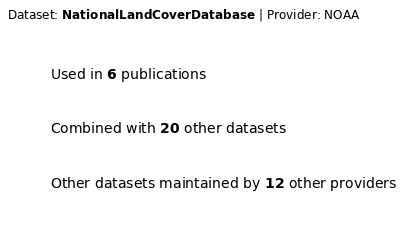

In [40]:
## this dataset with (1) same providers data and (2) other providers data

## draft "badge" with (1) number of publications, (2) number of other datasets, 
## (3) unique datasets, (4) same providers data, (5) other providers data

data_name = 'National Land Cover Database'
data_prov = 'NOAA'
num_pubs = 6
num_other_data = 20
joined_same_prov = 3
joined_other_prov = 19
num_other_prov = 12

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title(r'Dataset: $\bf{}$ | Provider: {}'.format(data_name, data_prov))
ax.text(.1, .75, r'Used in $\bf{}$ publications'.format(num_pubs), fontsize=14)
ax.text(.1, .5, r'Combined with $\bf{}$ other datasets'.format(num_other_data), fontsize=14)
ax.text(.1, .25, r'Other datasets maintained by $\bf{}$ other providers'.format(num_other_prov), fontsize=14)
ax.axis('off');

In [31]:
# function to generate rough draft 'badge'

# TO DO: add list of top datasets

def gen_badge(data_name, data_prov, num_pubs, num_other_data, num_other_prov):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_title(r'Dataset: $\bf{}$ | Provider: {}'.format(data_name, data_prov))
    ax.text(.1, .75, r'Used in $\bf{}$ publications'.format(num_pubs), fontsize=14)
    ax.text(.1, .5, r'Combined with $\bf{}$ other datasets'.format(num_other_data), fontsize=14)
    ax.text(.1, .25, r'Other datasets maintained by $\bf{}$ other providers'.format(num_other_prov), fontsize=14)
    ax.axis('off')
    plt.show();

In [46]:
df[df['RC_Provider']=='NOAA'].shape

(48, 11)

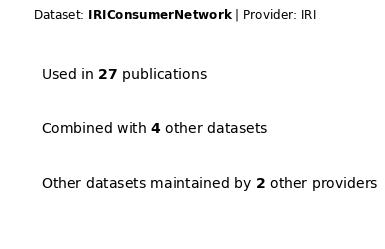

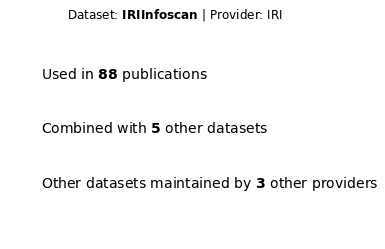

In [32]:
for idx, row in df[df['RC_Provider']=='IRI'].iterrows():
    gen_badge(row['Dataset_Name'], row['RC_Provider'], row['total_pubs'], row['num_unique_data_join'], row['num_unique_diff_prov'])

In [33]:
FoodAPS = df[df['RC_uuid']=='dataset-fc71e81f1f2c4130d897']
FoodAPS

,RC_uuid,Dataset_Name,RC_URL,RC_Provider,RC_rank,total_pubs,combined_data,num_unique_data_join,count_same_prov,count_diff_prov,num_unique_diff_prov
80,dataset-fc71e81f1f2c4130d897,FoodAPS National Household Food Acquisition an...,https://www.ers.usda.gov/data-products/foodaps...,US Department of Agriculture,0.8185,35,4,3,3,1,1


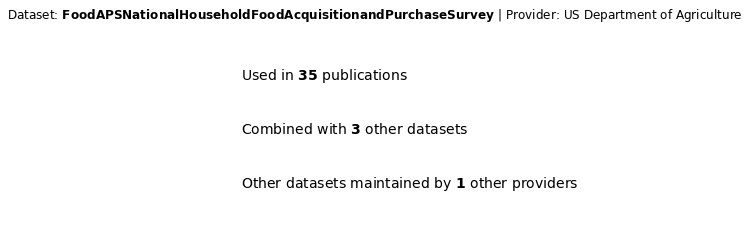

In [36]:
gen_badge(FoodAPS['Dataset_Name'].values[0], FoodAPS['RC_Provider'].values[0], FoodAPS['total_pubs'].values[0], 
          FoodAPS['num_unique_data_join'].values[0], FoodAPS['num_unique_diff_prov'].values[0])

In [37]:
ARMS = df[df['RC_uuid']=='dataset-955eb4bf66b73016354c']
ARMS

,RC_uuid,Dataset_Name,RC_URL,RC_Provider,RC_rank,total_pubs,combined_data,num_unique_data_join,count_same_prov,count_diff_prov,num_unique_diff_prov
353,dataset-955eb4bf66b73016354c,Agricultural Resource Management Survey,https://www.ers.usda.gov/data-products/arms-fa...,US Department of Agriculture,0.9384,320,144,72,91,53,25


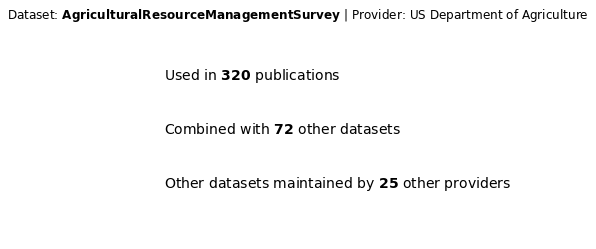

In [38]:
gen_badge(ARMS['Dataset_Name'].values[0], ARMS['RC_Provider'].values[0], ARMS['total_pubs'].values[0], 
          ARMS['num_unique_data_join'].values[0], ARMS['num_unique_diff_prov'].values[0])

In [39]:
data_linkages.head()

,DataRCID,DataRCName,DataRCProv,LinkedDataRCID,LinkedDataRCNames,LinkedDataRCProviders
0,dataset-d7abbc1e566a22068f1d,Maine Sea Level Rise,Maine Geological Survey,dataset-5e63059e69a541436b0e,Social Vulnerability Index,Centers for Disease Control and Prevention
0,dataset-b2063e7c8ba68a048d87,Iowa Medicaid Information System,Iowa Department of Human Services,dataset-709a0f04a29ebe08f595,Iowa Unemployment Insurance,Iowa Department of Human Services
1,dataset-b2063e7c8ba68a048d87,Iowa Medicaid Information System,Iowa Department of Human Services,dataset-fa32a644541b49b5ee55,Iowa Collection and Reporting System,Iowa Department of Human Services
2,dataset-b2063e7c8ba68a048d87,Iowa Medicaid Information System,Iowa Department of Human Services,dataset-9178d029d4cf48ee1030,Iowa Automated Benefit Calculation System Case...,Iowa Department of Human Services
3,dataset-b2063e7c8ba68a048d87,Iowa Medicaid Information System,Iowa Department of Human Services,dataset-49d2ddf05993f21462d5,Iowa Automated Benefit Calculation System Indi...,Iowa Department of Human Services


In [47]:
top_datasets = data_linkages[data_linkages['DataRCProv'].isin(['US Department of Agriculture', 'IRI'])]\
.groupby(['DataRCID', 'DataRCName', 'DataRCProv', 'LinkedDataRCProviders', 'LinkedDataRCNames'])['LinkedDataRCID'].count()\
.reset_index().sort_values(['DataRCName','LinkedDataRCID'], ascending=False)#.head()

In [51]:
top_datasets[top_datasets['DataRCID']=='dataset-955eb4bf66b73016354c'].to_csv('arms_top10.csv', index=False)

In [53]:
top_datasets[top_datasets['DataRCID']=='dataset-fc71e81f1f2c4130d897'].to_csv('FoodAPS_top.csv', index=False)

In [55]:
top_datasets[top_datasets['DataRCProv']=='IRI'].to_csv('IRI_top.csv', index=False)

In [56]:
publ_list

[[12566,
  'Returning to Work after Prison - Final Results from the Transitional Jobs Reentry Demonstration',
  0.5789848366199188],
 [10781,
  'Transitional jobs after release from prison: effects on employment and recidivism',
  0.5759948743503951],
 [1685,
  'Homelessness and Housing Insecurity Among Former Prisoners',
  0.5496547305474478],
 [8043,
  'UI as a Safety Net for Former TANF Recipients: Final Report',
  0.37680643553783727],
 [1024,
  'Use of Unemployment Insurance and Public Employment Services after Leaving Welfare',
  0.34882893144443655],
 [10394,
  'Use of Unemployment Insurance and Public Employment Services after Leaving Welfare',
  0.3487577418665907],
 [4992,
  'Use of Unemployment Insurance and Employment Services by Newly Unemployed Leavers from Temporary Assistance for Needy Families',
  0.31081369687477756],
 [11658,
  'Should UI Eligibility Be Expanded to Low-Earning Workers? Evidence on Employment, Transfer Receipt, and Income from Administrative Data',
  

In [57]:
net.publ[net.id_list[13372]].view

{'id': 'publication-012594773be6c5c8af7b',
 'title': 'The Effect of Work First Job Placements on the Distribution of Earnings: An Instrumental Variable Quantile Regression',
 'doi': '',
 'pdf': None,
 'journal': None,
 'abstract': '',
 'datasets': ['dataset-18202ba62256e4e8776f', 'dataset-fb7908039273841db7b1'],
 'authors': [],
 'topics': []}

In [59]:
for pub_res in publ_list:
    pub = net.publ[net.id_list[pub_res[0]]].view
    if pub['doi']!=None:
        print(pub['doi'])

https://doi.org/10.2139/ssrn.2056045
https://doi.org/10.1186/s40173-015-0043-8
https://doi.org/10.7758/rsf.2015.1.2.04

https://doi.org/10.2139/ssrn.2660341
https://doi.org/10.17848/ wp15-235

https://doi.org/10.2139/ssrn.2664580
https://doi.org/10.2139/ssrn.830905
https://doi.org/10.2139/ssrn.3175945
https://doi.org/10.1086/687522
https://doi.org/10.1002/jae.2653



In [60]:
data_linkages.head()

,DataRCID,DataRCName,DataRCProv,LinkedDataRCID,LinkedDataRCNames,LinkedDataRCProviders
0,dataset-d7abbc1e566a22068f1d,Maine Sea Level Rise,Maine Geological Survey,dataset-5e63059e69a541436b0e,Social Vulnerability Index,Centers for Disease Control and Prevention
0,dataset-b2063e7c8ba68a048d87,Iowa Medicaid Information System,Iowa Department of Human Services,dataset-709a0f04a29ebe08f595,Iowa Unemployment Insurance,Iowa Department of Human Services
1,dataset-b2063e7c8ba68a048d87,Iowa Medicaid Information System,Iowa Department of Human Services,dataset-fa32a644541b49b5ee55,Iowa Collection and Reporting System,Iowa Department of Human Services
2,dataset-b2063e7c8ba68a048d87,Iowa Medicaid Information System,Iowa Department of Human Services,dataset-9178d029d4cf48ee1030,Iowa Automated Benefit Calculation System Case...,Iowa Department of Human Services
3,dataset-b2063e7c8ba68a048d87,Iowa Medicaid Information System,Iowa Department of Human Services,dataset-49d2ddf05993f21462d5,Iowa Automated Benefit Calculation System Indi...,Iowa Department of Human Services


In [70]:
net.publ['publication-4e395f23c4a7d3e75b14'].view

{'id': 'publication-4e395f23c4a7d3e75b14',
 'title': 'Food Store Choices of Poor Households: A Discrete Choice Analysis of the National Household Food Acquisition and Purchase Survey (FoodAPS)',
 'doi': 'https://doi.org/10.1093/ajae/aaw009',
 'pdf': 'https://escholarship.org/content/qt22c7b7rt/qt22c7b7rt.pdf?t=ptm3uw',
 'journal': 'journal-d2133eb86805a072f35c',
 'abstract': '',
 'datasets': ['dataset-fc71e81f1f2c4130d897', 'dataset-5abb301866d99d0e76cf'],
 'authors': ['author-96dcf44903b901410709', 'author-968b1e9a60fc1ca353ed'],
 'topics': []}

In [72]:
net.auth['author-96dcf44903b901410709'].view

{'id': 'author-96dcf44903b901410709',
 'title': 'Villas‐Boas, Sofia Berto',
 'orcid': 'https://orcid.org/0000-0001-8443-4364',
 'used': True,
 'mle': {8173: [1, 0.42774491262999853],
  1989: [1, 0.42774491262999853],
  2378: [1, 0.42774491262999853]}}

In [74]:
## dataset links for 4 target datasets
data_list = ['dataset-955eb4bf66b73016354c', 'dataset-fc71e81f1f2c4130d897',
            'dataset-ae01c2bf3451493f3620', 'dataset-cb23c2370049f4960a3a']

data_linkages[data_linkages['DataRCID'].isin(data_list)].shape

(177, 9)

In [75]:
data_linkages[data_linkages['DataRCID'].isin(data_list)].to_csv('dataset_links_pubDOIs_0918.csv', index=False)

In [76]:
uuid, title, rank, url, provider, publ_list = net.reco_data(net.data['dataset-955eb4bf66b73016354c'])

In [77]:
publ_list

[[11493,
  'The Impacts of Climate Change on Agricultural Farm Profits in the U.S.',
  0.8086424147504805],
 [2921,
  "Land management change greatly impacts biofuels' greenhouse gas emissions",
  0.8085712251726348],
 [3226,
  'The Impact of Weather on Agricultural Labor Supply',
  0.8078593293941766],
 [11898, 'Air-quality-related health damages of maize', 0.8077881398163309],
 [6161,
  'Potential Farm-Level Effects of Eliminating Direct Payments',
  0.8045134192354239],
 [5639,
  'Agricultural Resources and Environmental Indicators, 2012 Edition',
  0.8032320068341994],
 [5195,
  'Modeling Nonresponse in Establishment Surveys: Using an Ensemble Tree Model to Create Nonresponse Propensity Scores and Detect Potential Bias in an Agricultural Survey',
  0.8025201110557414],
 [5589,
  'The Financial Performance Implications of Differential Marketing Strategies: Exploring Farms that Pursue Local Markets as a Core Competitive Advantage',
  0.8014522673880543],
 [9976,
  'Estimating the unc

In [78]:
len(publ_list)

320

In [80]:
net.publ[net.id_list[publ_list[6][0]]].view

{'id': 'publication-d864fb8e65b9911da285',
 'title': 'Modeling Nonresponse in Establishment Surveys: Using an Ensemble Tree Model to Create Nonresponse Propensity Scores and Detect Potential Bias in an Agricultural Survey',
 'doi': 'https://doi.org/10.2478/jos-2014-0044',
 'pdf': 'https://content.sciendo.com/downloadpdf/journals/jos/30/4/article-p701.pdf',
 'journal': 'journal-388a0fd3b1aef791eb9f',
 'abstract': '',
 'datasets': ['dataset-955eb4bf66b73016354c'],
 'authors': ['author-ad0b6700cc208ad4c996',
  'author-2528f731c9c280748899',
  'author-e1113516a3433e2b5aad',
  'author-8be0cada94debc4a4a97',
  'author-96ab1026b6bf3f555a12',
  'author-7daa66d1c751bbb2f936'],
 'topics': []}

In [84]:
publ_list[4], provider

[6161,
 'Potential Farm-Level Effects of Eliminating Direct Payments',
 0.8045134192354239]

In [82]:
test_pids = []
for pid, pubName, pubRank in publ_list:
#     print(len(net.publ[net.id_list[pid]].view['datasets']))
    test_pids.append(pid)

In [83]:
len(test_pids), len(set(test_pids))

(320, 320)